# DESAFIO IFOOD DE CLUSTERING

## Contexto Analítico

A diversidade e amplitude de clientes que utilizam a plataforma do iFood é gigante - a cobertura do aplicativo se estende por muitas geografias no Brasil, de múltiplos gostos, regionalismos e bolsos. Alguns buscam uma experiência no momento da refeição, outros só querem receber a marmita na hora certa para não se atrasar para a primeira reunião pós-almoço.

Neste contexto, precisamos entender melhor nossos clientes! Quem é o mais fiel e quem mais compra conosco? Quem mais gosta de cupom? Quem gosta de entrega grátis? Qual o padrão de consumo? Qual o padrão de comportamento? Quanto os clientes vão gastar? Onde?

In [2]:
# Importando biliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Base de dados

In [3]:
# Importando dados
dadosmarketing = pd.read_csv("marketing1.csv")
marketing = dadosmarketing[:]

In [4]:
marketing

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19
2,61c051ee-d37c-45c6-8c22-c236db3b62b7,2018-09-02,Active,Active,206,2018-09-02
3,82e48692-e4fa-494e-b03e-6815a819b7b1,2017-11-10,Reactivated,Churn,47,2018-05-01
4,382af025-14c8-4ba9-b62f-deddd6f25789,2019-08-05,Inactive,Inactive,66,2019-08-12
...,...,...,...,...,...,...
20244,43ca9ecf-4a84-46c0-bddc-08500cc2dadd,2015-08-03,Inactive,Inactive,1186,2015-08-17
20245,bba67e7e-6760-4f0d-846c-b85af925acf1,2019-03-17,Inactive,Inactive,4,2019-12-11
20246,d0ceeec4-3cc6-4878-acf9-a0f4aeb95f66,2020-01-07,Inactive,Inactive,2,2020-02-13
20247,e0ec291a-cd2f-428a-a6ab-5f88b5d141dd,2017-08-12,Inactive,Inactive,263,2017-08-12


In [5]:
dadosorders = pd.read_csv("orders1.csv")
orders = dadosorders[:]

In [6]:
pd.set_option('display.max_columns', None)
orders

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,centroid_id,state_label,city,district,customer_long,customer_lat,restaurant_id,dish_type,group_id,merchant_centroid_id,merchant_state,merchant_city,merchant_district,merchant_zipcode,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at;;
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.00,False,5375.0,0.0,ANDROID,MOBILE,9.39.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,83c3e069dbd7267a7565a16b879cd968c0968a27ac16e6...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.38,RJ,RIO DE JANEIRO,PAVUNA,21650420.0,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-02-28T19:06:31.861Z;;
1,0018ed39-3ae0-4047-9c9e-fd9a2027e645,weekend dinner,RESTAURANT,0.00,False,2987.5,1250.0,IOS,MOBILE,9.63.0,-22.93-43.18,RJ,RIO DE JANEIRO,FLAMENGO,-43.18,-22.94,2531d200d387f462ed6e096086723c43b48de9b6c3ec05...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.93-43.21,RJ,RIO DE JANEIRO,Rio Comprido,20261170.0,-43.22,-22.93,True,2020-08-21T21:12:23.295Z,2020-08-21T21:59:18.732Z,1.0,407bab9f-f485-48cd-abea-66e6283058c3,5.0,8.0,2020-09-04T00:14:14.365Z;;
2,00214248-5a2d-4333-a919-c1f3afd31389,weekday dinner,RESTAURANT,0.00,False,3737.5,2123.75,IOS,MOBILE,9.56.0,-23.6-46.64,SP,SAO PAULO,Vila Clementino,-46.65,-23.60,e648c3eeabfbbc52d415e4f2b4bb07ed0206c7fff7fb9c...,Comida Peruana,5384e3b557315ce815e7e3425a4d067f1ecff96978501e...,-23.61-46.67,SP,SAO PAULO,INDIANOPOLIS,4029200.0,-46.67,-23.62,True,2020-07-02T20:21:51.900Z,2020-07-02T20:53:39.176Z,3.0,a16865d2-a3ca-4251-afab-083dadeb06e9,5.0,5.0,2020-07-03T03:49:03.214Z;;
3,007199e6-6be4-42d0-986c-a0de7650dc80,weekday dinner,RESTAURANT,862.50,False,2237.5,1.25,DESKTOP,SITE,8.39.0,-22.96-43.39,RJ,RIO DE JANEIRO,Curicica,-43.39,-22.96,c3b2f2bc35b781c126ab4e78db73aa5609e55b1eff34c8...,Pizza,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.96-43.4,RJ,RIO DE JANEIRO,Curicica,22780193.0,-43.40,-22.96,False,2020-08-19T20:16:16.718Z,2020-08-19T22:16:16.298Z,0.0,a7f00fd8-d5d6-4604-9bce-ffe35b16848d,5.0,10.0,2020-08-26T17:44:08.137Z;;
4,00bb6d10-0a9b-4fe3-9b25-8d18f50bcc3a,weekday lunch,RESTAURANT,0.00,False,2750.0,0.0,DESKTOP,SITE,8.12.0,-23.57-46.64,SP,SAO PAULO,Liberdade,-46.64,-23.57,63271292b131c157593c309acfcbcd5756ec1440879e64...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-23.59-46.64,SP,SAO PAULO,Vila Mariana,4009002.0,-46.64,-23.59,True,2020-04-15T13:01:55.231Z,2020-04-15T17:02:37.723Z,1.0,63284037-3ade-4600-88e9-5009b9504d8f,5.0,10.0,2020-04-17T22:05:13.983Z;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226264,fe810a8e-97be-4a85-a6c0-eb446fd72fd9,weekend dawn,RESTAURANT,375.00,False,10437.5,0.0,IOS,MOBILE,9.52.0,-22.95-43.34,RJ,RIO DE JANEIRO,ANIL,-43.34,-22.95,d07d54994d14abe915f1fd678ed66284d6810d60344536...,Lanches,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.95-43.36,RJ,RIO DE JANEIRO,Cidade de Deus,22763011.0,-43.36,-22.95,False,2020-05-31T01:12:22.097Z,2020-05-31T03:23:49.538Z,2.0,f415e4e7-097a-4b32-8fb9-6361658db37b,5.0,10.0,2020-05-31T06:24:22.437Z;;
226265,feb7b532-9602-4623-b89d-32697a0b6e17,weekday breakfast,RESTAURANT,873.75,False,6348.75,0.0,ANDROID,MOBILE,9.56.0,-23.6-46.61,SP,SAO PAULO,Vila Nair,-46.61,-23.61,70f36e5a2493ada1c021b99241012501a241d946c2564a...,Padaria,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-23.58-46.61,SP,SAO PAULO,Ipiranga,4205001.0,-46.61,-23.59,False,2020-06-30T08:27:56.247Z,2020-06-30T08:51:08.729Z,1.0,d03e5849-703e-4e49-a051-7a5d652c3b28,5.0,10.0,2020-06-30T17:13:24.936Z;;
226266,ff54b0d0-6bd3-4bad-a34c-ec64f0b17787,weekday dinner,RESTAURANT,875.00,False,8512.5

In [7]:
dadossessions = pd.read_csv("sessions.csv", sep=';')
sessions = dadossessions[:]

In [8]:
sessions

,session_id,user_account_uuid,session_started,session_ended,install_timestamp,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,first_order_has_voucher,media_campaign,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01T00:00:03.924Z,2020-02-01T00:10:51.217Z,NaN,19,5,6,6,7,False,NaN,5.0,462.0,1
1,b01811cd-ad2c-42f1-bccf-b90698ccc7a8,20cb43a7-c90d-4451-b067-e1b934746de6,2020-02-01T00:00:09.616Z,2020-02-01T00:14:22.713Z,NaN,14,1,0,0,0,NaN,NaN,5.0,128.0,2
2,aa453bd1-da47-4cfa-9ce7-a7e2c9227dec,b6bd9094-c2f0-471c-b6ec-9475d8d0591b,2020-02-01T00:00:14.479Z,2020-02-01T00:08:20.102Z,NaN,31,4,4,3,1,False,NaN,6.0,187.0,3
3,39ca6d98-c9d1-4dff-9158-c7416be6d309,d7ddb2ac-31bf-4e3d-848a-9efc86a70f6d,2020-02-01T00:00:14.650Z,2020-02-01T00:02:49.615Z,NaN,12,3,0,0,0,NaN,NaN,5.0,22.0,4
4,cf456658-0426-46c2-b6c1-fc27c186e15e,8d9bb514-cc57-4181-bb9d-b94b7fbbfd98,2020-02-01T00:00:41.607Z,2020-02-01T00:16:57.415Z,NaN,4,0,0,0,0,NaN,NaN,28.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591506,85770037-9a5c-4ac3-8ba3-ae2b83135e73,9b8c5cb4-837d-4457-bf66-ac1ecdf108cd,2020-09-30T23:59:29.388Z,2020-10-01T00:00:18.295Z,NaN,6,1,1,1,0,NaN,NaN,4.0,220.0,3591507
3591507,45072446-a0cd-4747-8de9-07875633c5e0,9eb99387-ee18-4930-801b-b7201ae46df9,2020-09-30T23:59:37.159Z,2020-10-01T00:44:50.978Z,NaN,3,1,1,2,2,NaN,NaN,3.0,460.0,3591508
3591508,871c9936-e287-439b-88e5-f85e9fdde177,23aeed54-ec20-448f-8857-d321c18cf411,2020-09-30T23:59:40.218Z,2020-10-01T00:01:49.361Z,NaN,0,0,0,0,0,NaN,NaN,4.0,241.0,3591509
3591509,bda71adc-50bb-48bd-82cc-647174b3bfa5,4b8bc8a5-cf2d-4d77-bea9-64ed735fe4ec,2020-09-30T23:59:51.837Z,2020-10-01T00:01:56.597Z,NaN,2,0,0,0,0,NaN,NaN,3.0,14.0,3591510


## Tratamento dos dados

In [9]:
marketing.info() #Somente um valor nulo na data do primeiro pedido feito

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20249 entries, 0 to 20248
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   account_id               20249 non-null  object
 1   registration_date        20249 non-null  object
 2   ifood_status             20249 non-null  object
 3   ifood_status_last_month  20249 non-null  object
 4   total_order_count        20249 non-null  int64 
 5   first_order_date         20248 non-null  object
dtypes: int64(1), object(5)
memory usage: 949.3+ KB


In [10]:
# Verificando se há variáveis duplicadas
marketing.shape

(20249, 6)

In [11]:
marketing.drop_duplicates(keep=False, inplace=True) #Excluindo variáveis duplicadas

In [13]:
marketing.shape #Não haviam dados duplicados

(20249, 6)

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226269 entries, 0 to 226268
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              226269 non-null  object 
 1   order_shift           221634 non-null  object 
 2   order_origin          221634 non-null  object 
 3   delivery_fee          221634 non-null  float64
 4   scheduled             221634 non-null  object 
 5   total_amount          221634 non-null  object 
 6   subsidy_amount        221634 non-null  object 
 7   device_platform       221634 non-null  object 
 8   device_type           221634 non-null  object 
 9   device_app_version    221634 non-null  object 
 10  centroid_id           221634 non-null  object 
 11  state_label           221634 non-null  object 
 12  city                  221633 non-null  object 
 13  district              221633 non-null  object 
 14  customer_long         221633 non-null  float64
 15  

In [13]:
orders.isnull().sum() #Muitos valores nulos, excluir

order_id                   0
order_shift             4635
order_origin            4635
delivery_fee            4635
scheduled               4635
total_amount            4635
subsidy_amount          4635
device_platform         4635
device_type             4635
device_app_version      4635
centroid_id             4635
state_label             4635
city                    4636
district                4636
customer_long           4636
customer_lat            4636
restaurant_id           4636
dish_type               4636
group_id                4636
merchant_centroid_id    4636
merchant_state          4636
merchant_city           4636
merchant_district       4636
merchant_zipcode        4636
merchant_long           4636
merchant_lat            4636
has_free_delivery       4636
confirmed_date          4636
concluded_date          4636
lag_last_order          4636
account_id              4636
review_score            4636
nps_score               4636
review_created_at;;     4636
dtype: int64

In [15]:
# Verificando se há variáveis duplicadas
orders.shape

(226269, 34)

In [16]:
orders.drop_duplicates(keep=False, inplace=True)

In [17]:
orders.shape #Não haviam dados duplicados

(226269, 34)

In [18]:
#Excluindo linhas onde todos os valores são nulos
orders = orders.dropna(thresh=33)

In [19]:
226269-221633 #Comando acima excluiu dados faltantes em orders, que eram linhas completas

4636

In [20]:
orders.isnull().sum()

order_id                0
order_shift             0
order_origin            0
delivery_fee            0
scheduled               0
total_amount            0
subsidy_amount          0
device_platform         0
device_type             0
device_app_version      0
centroid_id             0
state_label             0
city                    0
district                0
customer_long           0
customer_lat            0
restaurant_id           0
dish_type               0
group_id                0
merchant_centroid_id    0
merchant_state          0
merchant_city           0
merchant_district       0
merchant_zipcode        0
merchant_long           0
merchant_lat            0
has_free_delivery       0
confirmed_date          0
concluded_date          0
lag_last_order          0
account_id              0
review_score            0
nps_score               0
review_created_at;;     0
dtype: int64

In [21]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3591511 entries, 0 to 3591510
Data columns (total 15 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   session_id                  object 
 1   user_account_uuid           object 
 2   session_started             object 
 3   session_ended               object 
 4   install_timestamp           object 
 5   sum_view_restaurant_screen  int64  
 6   sum_view_dish_screen        int64  
 7   sum_click_add_item          int64  
 8   sum_view_checkout           int64  
 9   sum_callback_purchase       int64  
 10  first_order_has_voucher     object 
 11  media_campaign              object 
 12  load_time                   float64
 13  available_restaurants       float64
 14  rownumber                   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 411.0+ MB


In [22]:
sessions.isnull().sum() #Maioria dos dados faltantes em primeira instalação do app após setup, se utilizado voucher no primeiro
#pedido, se a sessão foi iniciada por campanha de mídia. Muitos dados faltantes também em horário do término da sessão e tempo
#de carregamento inicial da sessão

session_id                          0
user_account_uuid                   0
session_started                     0
session_ended                   45745
install_timestamp             3579968
sum_view_restaurant_screen          0
sum_view_dish_screen                0
sum_click_add_item                  0
sum_view_checkout                   0
sum_callback_purchase               0
first_order_has_voucher       3170881
media_campaign                3538088
load_time                      743400
available_restaurants               0
rownumber                           0
dtype: int64

In [23]:
sessions.isna().mean() #Dados faltantes que passam de 80% serão excluidos a coluna toda

session_id                    0.000000
user_account_uuid             0.000000
session_started               0.000000
session_ended                 0.012737
install_timestamp             0.996786
sum_view_restaurant_screen    0.000000
sum_view_dish_screen          0.000000
sum_click_add_item            0.000000
sum_view_checkout             0.000000
sum_callback_purchase         0.000000
first_order_has_voucher       0.882882
media_campaign                0.985125
load_time                     0.206988
available_restaurants         0.000000
rownumber                     0.000000
dtype: float64

In [24]:
sessions.drop(["install_timestamp", "first_order_has_voucher", "media_campaign"], axis=1, inplace=True)

In [25]:
#Verificando dados duplicados
sessions.shape

(3591511, 12)

In [26]:
sessions.drop_duplicates(keep=False, inplace=True)

In [27]:
sessions.shape #Não haviam dados duplicados

(3591511, 12)

In [28]:
pd.set_option('display.max_columns', None)
sessions

,session_id,user_account_uuid,session_started,session_ended,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01T00:00:03.924Z,2020-02-01T00:10:51.217Z,19,5,6,6,7,5.0,462.0,1
1,b01811cd-ad2c-42f1-bccf-b90698ccc7a8,20cb43a7-c90d-4451-b067-e1b934746de6,2020-02-01T00:00:09.616Z,2020-02-01T00:14:22.713Z,14,1,0,0,0,5.0,128.0,2
2,aa453bd1-da47-4cfa-9ce7-a7e2c9227dec,b6bd9094-c2f0-471c-b6ec-9475d8d0591b,2020-02-01T00:00:14.479Z,2020-02-01T00:08:20.102Z,31,4,4,3,1,6.0,187.0,3
3,39ca6d98-c9d1-4dff-9158-c7416be6d309,d7ddb2ac-31bf-4e3d-848a-9efc86a70f6d,2020-02-01T00:00:14.650Z,2020-02-01T00:02:49.615Z,12,3,0,0,0,5.0,22.0,4
4,cf456658-0426-46c2-b6c1-fc27c186e15e,8d9bb514-cc57-4181-bb9d-b94b7fbbfd98,2020-02-01T00:00:41.607Z,2020-02-01T00:16:57.415Z,4,0,0,0,0,28.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3591506,85770037-9a5c-4ac3-8ba3-ae2b83135e73,9b8c5cb4-837d-4457-bf66-ac1ecdf108cd,2020-09-30T23:59:29.388Z,2020-10-01T00:00:18.295Z,6,1,1,1,0,4.0,220.0,3591507
3591507,45072446-a0cd-4747-8de9-07875633c5e0,9eb99387-ee18-4930-801b-b7201ae46df9,2020-09-30T23:59:37.159Z,2020-10-01T00:44:50.978Z,3,1,1,2,2,3.0,460.0,3591508
3591508,871c9936-e287-439b-88e5-f85e9fdde177,23aeed54-ec20-448f-8857-d321c18cf411,2020-09-30T23:59:40.218Z,2020-10-01T00:01:49.361Z,0,0,0,0,0,4.0,241.0,3591509
3591509,bda71adc-50bb-48bd-82cc-647174b3bfa5,4b8bc8a5-cf2d-4d77-bea9-64ed735fe4ec,2020-09-30T23:59:51.837Z,2020-10-01T00:01:56.597Z,2,0,0,0,0,3.0,14.0,3591510


In [29]:
sessions.isna().mean()

session_id                    0.000000
user_account_uuid             0.000000
session_started               0.000000
session_ended                 0.012737
sum_view_restaurant_screen    0.000000
sum_view_dish_screen          0.000000
sum_click_add_item            0.000000
sum_view_checkout             0.000000
sum_callback_purchase         0.000000
load_time                     0.206988
available_restaurants         0.000000
rownumber                     0.000000
dtype: float64

In [30]:
sessions.describe()

,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,load_time,available_restaurants,rownumber
count,3.591511e+06,3.591511e+06,3.591511e+06,3.591511e+06,3.591511e+06,2.848111e+06,3.591511e+06,3.591511e+06
mean,6.541976e+00,3.401753e+00,1.613600e+00,2.015747e+00,7.375651e-01,3.995431e+01,1.161834e+03,1.795756e+06
std,1.290502e+01,6.024095e+00,2.866229e+00,4.228897e+00,2.103870e+00,1.019375e+03,1.121173e+03,1.036780e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.597200e+04,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,3.240000e+02,8.978785e+05
50%,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,8.310000e+02,1.795756e+06
75%,8.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,1.650000e+03,2.693634e+06
max,2.612000e+03,6.350000e+02,3.020000e+02,4.220000e+02,6.810000e+02,1.120474e+06,6.149000e+03,3.591511e+06


In [31]:
#Renomear coluna user_account_uuid de sessions para account_id para ser possível unir df
sessions = sessions.rename(columns={'user_account_uuid': 'account_id'}) 

In [32]:
sessions

,session_id,account_id,session_started,session_ended,sum_view_restaurant_screen,sum_view_dish_screen,sum_click_add_item,sum_view_checkout,sum_callback_purchase,load_time,available_restaurants,rownumber
0,0a364c77-4375-4334-8f64-a06bdd22229c,5a2fbdea-e2ee-41a5-b47c-41fbebdc78ef,2020-02-01T00:00:03.924Z,2020-02-01T00:10:51.217Z,19,5,6,6,7,5.0,462.0,1
1,b01811cd-ad2c-42f1-bccf-b90698ccc7a8,20cb43a7-c90d-4451-b067-e1b934746de6,2020-02-01T00:00:09.616Z,2020-02-01T00:14:22.713Z,14,1,0,0,0,5.0,128.0,2
2,aa453bd1-da47-4cfa-9ce7-a7e2c9227dec,b6bd9094-c2f0-471c-b6ec-9475d8d0591b,2020-02-01T00:00:14.479Z,2020-02-01T00:08:20.102Z,31,4,4,3,1,6.0,187.0,3
3,39ca6d98-c9d1-4dff-9158-c7416be6d309,d7ddb2ac-31bf-4e3d-848a-9efc86a70f6d,2020-02-01T00:00:14.650Z,2020-02-01T00:02:49.615Z,12,3,0,0,0,5.0,22.0,4
4,cf456658-0426-46c2-b6c1-fc27c186e15e,8d9bb514-cc57-4181-bb9d-b94b7fbbfd98,2020-02-01T00:00:41.607Z,2020-02-01T00:16:57.415Z,4,0,0,0,0,28.0,3.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3591506,85770037-9a5c-4ac3-8ba3-ae2b83135e73,9b8c5cb4-837d-4457-bf66-ac1ecdf108cd,2020-09-30T23:59:29.388Z,2020-10-01T00:00:18.295Z,6,1,1,1,0,4.0,220.0,3591507
3591507,45072446-a0cd-4747-8de9-07875633c5e0,9eb99387-ee18-4930-801b-b7201ae46df9,2020-09-30T23:59:37.159Z,2020-10-01T00:44:50.978Z,3,1,1,2,2,3.0,460.0,3591508
3591508,871c9936-e287-439b-88e5-f85e9fdde177,23aeed54-ec20-448f-8857-d321c18cf411,2020-09-30T23:59:40.218Z,2020-10-01T00:01:49.361Z,0,0,0,0,0,4.0,241.0,3591509
3591509,bda71adc-50bb-48bd-82cc-647174b3bfa5,4b8bc8a5-cf2d-4d77-bea9-64ed735fe4ec,2020-09-30T23:59:51.837Z,2020-10-01T00:01:56.597Z,2,0,0,0,0,3.0,14.0,3591510


## EDA

In [33]:
df1 = orders.merge(marketing, on = 'account_id', how = 'outer')

In [34]:
df1.isna().sum()

order_id                   6388
order_shift                6388
order_origin               6388
delivery_fee               6388
scheduled                  6388
total_amount               6388
subsidy_amount             6388
device_platform            6388
device_type                6388
device_app_version         6388
centroid_id                6388
state_label                6388
city                       6388
district                   6388
customer_long              6388
customer_lat               6388
restaurant_id              6388
dish_type                  6388
group_id                   6388
merchant_centroid_id       6388
merchant_state             6388
merchant_city              6388
merchant_district          6388
merchant_zipcode           6388
merchant_long              6388
merchant_lat               6388
has_free_delivery          6388
confirmed_date             6388
concluded_date             6388
lag_last_order             6388
account_id                    0
review_s

In [35]:
df1

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,centroid_id,state_label,city,district,customer_long,customer_lat,restaurant_id,dish_type,group_id,merchant_centroid_id,merchant_state,merchant_city,merchant_district,merchant_zipcode,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at;;,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.00,False,5375.0,0.0,ANDROID,MOBILE,9.39.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,83c3e069dbd7267a7565a16b879cd968c0968a27ac16e6...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.38,RJ,RIO DE JANEIRO,PAVUNA,21650420.0,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-02-28T19:06:31.861Z;;,2019-06-10,Active,Active,216,2019-07-24
1,137fb568-2756-408d-94ed-d67e011bd101,weekday lunch,RESTAURANT,500.00,False,4625.0,0.0,ANDROID,MOBILE,9.61.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,caea67d70fc15b47f91313697d74218975c595332ad3c7...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.35,RJ,RIO DE JANEIRO,Pavuna,21532440.0,-43.36,-22.82,False,2020-08-05T12:04:11.975Z,2020-08-05T13:58:07.939Z,4.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-08-05T16:59:05.170Z;;,2019-06-10,Active,Active,216,2019-07-24
2,4605cdab-de39-45c8-81aa-deb752039354,weekday lunch,RESTAURANT,1125.00,False,7250.0,0.0,ANDROID,MOBILE,9.47.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,fb61026e05c21f18bbd85fb17112f7e39a67fb69a76285...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.3,RJ,RIO DE JANEIRO,Cordovil,21010180.0,-43.30,-22.82,False,2020-04-22T12:23:32.554Z,2020-04-22T14:41:57.633Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-04-22T18:28:34.009Z;;,2019-06-10,Active,Active,216,2019-07-24
3,2244c745-4b28-4544-bbd6-4e1101fda966,weekday lunch,RESTAURANT,998.75,False,7321.25,0.0,ANDROID,MOBILE,9.47.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,a10244c99caff623e5d1df2ed3c60b718c1692892790c6...,Doces & Bolos,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.79-43.36,RJ,SAO JOAO DE MERITI,JARDIM JOSE BONIFACIO,25565370.0,-43.37,-22.79,False,2020-04-23T14:17:16.606Z,2020-04-23T14:52:40.470Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-04-24T03:15:23.114Z;;,2019-06-10,Active,Active,216,2019-07-24
4,f4ebb4d5-f4b6-4799-bd8a-5f77aaec8d71,weekend dinner,RESTAURANT,1498.75,False,5623.75,0.0,ANDROID,MOBILE,9.42.2,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,4a6ee271e930ff43ded123ac235b7ab305f75f9b12bc59...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.8-43.39,RJ,SAO JOAO DE MERITI,Tomazinho,25525520.0,-43.40,-22.81,False,2020-03-15T18:43:35.517Z,2020-03-15T19:37:59.175Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-03-16T02:24:28.095Z;;,2019-06-10,Active,Active,216,2019-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5e82dc70-ed3a-4f11-8323-ad52d85e6f41,NaN,NaN,NaN,2019-09-17,Reactivated,Churn,29,2019-10-02
228017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,983b8d28-d737-4ae2-bf37-55ab68fc4a00,NaN,NaN,NaN,2020-02-03,Inactive,Churn,8,2020-02-13
228018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f6b9bdae-3897-4ebc-af3d-66641c800485,NaN,NaN,NaN,2019-05-30,Churn,Active,24,2019-05-30
228019,NaN,NaN,

In [36]:
#Excluindo linhas que ficaram com muitos nulos
df2 = df1.dropna(thresh=33)

In [37]:
df2.isna().sum()

order_id                   0
order_shift                0
order_origin               0
delivery_fee               0
scheduled                  0
total_amount               0
subsidy_amount             0
device_platform            0
device_type                0
device_app_version         0
centroid_id                0
state_label                0
city                       0
district                   0
customer_long              0
customer_lat               0
restaurant_id              0
dish_type                  0
group_id                   0
merchant_centroid_id       0
merchant_state             0
merchant_city              0
merchant_district          0
merchant_zipcode           0
merchant_long              0
merchant_lat               0
has_free_delivery          0
confirmed_date             0
concluded_date             0
lag_last_order             0
account_id                 0
review_score               0
nps_score                  0
review_created_at;;        0
registration_d

In [ ]:
#Não foi possível unir com dataset sessions, muito grande

In [38]:
# Transformando amount de objeto para float
df2["total_amount"] = df2["total_amount"].astype(float)

In [39]:
df2["subsidy_amount"] = df2["subsidy_amount"].astype(float)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221633 entries, 0 to 221632
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 221633 non-null  object 
 1   order_shift              221633 non-null  object 
 2   order_origin             221633 non-null  object 
 3   delivery_fee             221633 non-null  float64
 4   scheduled                221633 non-null  object 
 5   total_amount             221633 non-null  float64
 6   subsidy_amount           221633 non-null  float64
 7   device_platform          221633 non-null  object 
 8   device_type              221633 non-null  object 
 9   device_app_version       221633 non-null  object 
 10  centroid_id              221633 non-null  object 
 11  state_label              221633 non-null  object 
 12  city                     221633 non-null  object 
 13  district                 221633 non-null  object 
 14  cust

In [41]:
#Converter variáveis que estão em centavos para reais
df2['delivery_fee'] = df2['delivery_fee']/100
df2['total_amount'] = df2['total_amount']/100
df2['subsidy_amount'] = df2['subsidy_amount']/100

In [42]:
df2

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,centroid_id,state_label,city,district,customer_long,customer_lat,restaurant_id,dish_type,group_id,merchant_centroid_id,merchant_state,merchant_city,merchant_district,merchant_zipcode,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at;;,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,8.7500,False,53.7500,0.0,ANDROID,MOBILE,9.39.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,83c3e069dbd7267a7565a16b879cd968c0968a27ac16e6...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.38,RJ,RIO DE JANEIRO,PAVUNA,21650420.0,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-02-28T19:06:31.861Z;;,2019-06-10,Active,Active,216,2019-07-24
1,137fb568-2756-408d-94ed-d67e011bd101,weekday lunch,RESTAURANT,5.0000,False,46.2500,0.0,ANDROID,MOBILE,9.61.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,caea67d70fc15b47f91313697d74218975c595332ad3c7...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.35,RJ,RIO DE JANEIRO,Pavuna,21532440.0,-43.36,-22.82,False,2020-08-05T12:04:11.975Z,2020-08-05T13:58:07.939Z,4.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-08-05T16:59:05.170Z;;,2019-06-10,Active,Active,216,2019-07-24
2,4605cdab-de39-45c8-81aa-deb752039354,weekday lunch,RESTAURANT,11.2500,False,72.5000,0.0,ANDROID,MOBILE,9.47.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,fb61026e05c21f18bbd85fb17112f7e39a67fb69a76285...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.3,RJ,RIO DE JANEIRO,Cordovil,21010180.0,-43.30,-22.82,False,2020-04-22T12:23:32.554Z,2020-04-22T14:41:57.633Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-04-22T18:28:34.009Z;;,2019-06-10,Active,Active,216,2019-07-24
3,2244c745-4b28-4544-bbd6-4e1101fda966,weekday lunch,RESTAURANT,9.9875,False,73.2125,0.0,ANDROID,MOBILE,9.47.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,a10244c99caff623e5d1df2ed3c60b718c1692892790c6...,Doces & Bolos,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.79-43.36,RJ,SAO JOAO DE MERITI,JARDIM JOSE BONIFACIO,25565370.0,-43.37,-22.79,False,2020-04-23T14:17:16.606Z,2020-04-23T14:52:40.470Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-04-24T03:15:23.114Z;;,2019-06-10,Active,Active,216,2019-07-24
4,f4ebb4d5-f4b6-4799-bd8a-5f77aaec8d71,weekend dinner,RESTAURANT,14.9875,False,56.2375,0.0,ANDROID,MOBILE,9.42.2,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,4a6ee271e930ff43ded123ac235b7ab305f75f9b12bc59...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.8-43.39,RJ,SAO JOAO DE MERITI,Tomazinho,25525520.0,-43.40,-22.81,False,2020-03-15T18:43:35.517Z,2020-03-15T19:37:59.175Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8.0,2020-03-16T02:24:28.095Z;;,2019-06-10,Active,Active,216,2019-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221628,72092f74-7366-4afe-9e74-d575d679cc01,weekend lunch,RESTAURANT,0.0000,False,27.5000,0.0,ANDROID,MOBILE,9.39.1,-23.63-46.61,SP,SAO PAULO,Vila Moraes,-46.61,-23.64,5f731c493c83b9f845d0d6fd846c4698e23300d8aeb578...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-23.63-46.62,SP,SAO PAULO,Vila Brasilina,4161070.0,-46.62,-23.64,True,2020-03-01T11:55:18.737Z,2020-03-01T13:55:18.201Z,7.0,1df4e2cf-07c8-4d82-b830-5aa33505bf2f,5.0,10.0,2020-03-15T19:54:48.660Z;;,2018-02-07,Inactive,Inactive,11,2018-02-08
221629,9511254e-bedb-478f-afb4-7baff3d6413e,weekday dinner,RESTAURANT,0.0000,False,60.5875,0.0,IOS,MOBILE,9.60.0,-22.83-43.35,RJ,RIO D

In [43]:
#Selecionando somente colunas numéricas
dfnumeral = df2[['delivery_fee', 'total_amount', 'subsidy_amount', 'customer_long', 'customer_lat', 'merchant_zipcode',
                 'merchant_long', 'merchant_lat','lag_last_order', 'review_score', 'nps_score', 'total_order_count']]

In [44]:
dfnumeral

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,lag_last_order,review_score,nps_score,total_order_count
0,8.7500,53.7500,0.0,-43.35,-22.83,21650420.0,-43.38,-22.83,1.0,5.0,8.0,216
1,5.0000,46.2500,0.0,-43.35,-22.83,21532440.0,-43.36,-22.82,4.0,5.0,8.0,216
2,11.2500,72.5000,0.0,-43.35,-22.83,21010180.0,-43.30,-22.82,1.0,5.0,8.0,216
3,9.9875,73.2125,0.0,-43.35,-22.83,25565370.0,-43.37,-22.79,1.0,5.0,8.0,216
4,14.9875,56.2375,0.0,-43.35,-22.83,25525520.0,-43.40,-22.81,1.0,5.0,8.0,216
...,...,...,...,...,...,...,...,...,...,...,...,...
221628,0.0000,27.5000,0.0,-46.61,-23.64,4161070.0,-46.62,-23.64,7.0,5.0,10.0,11
221629,0.0000,60.5875,0.0,-43.36,-22.83,21230075.0,-43.34,-22.83,134.0,2.0,7.0,33
221630,8.7375,59.9875,0.0,-46.70,-23.56,1310928.0,-46.66,-23.56,1.0,5.0,8.0,551
221631,12.5000,49.8750,0.0,-46.59,-23.50,2340002.0,-46.62,-23.47,13.0,3.0,7.0,340


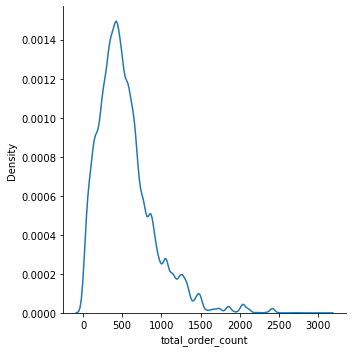

In [45]:
sns.displot(dfnumeral["total_order_count"], kind='kde')

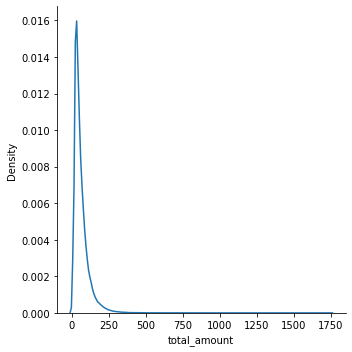

In [46]:
sns.displot(dfnumeral["total_amount"], kind='kde')

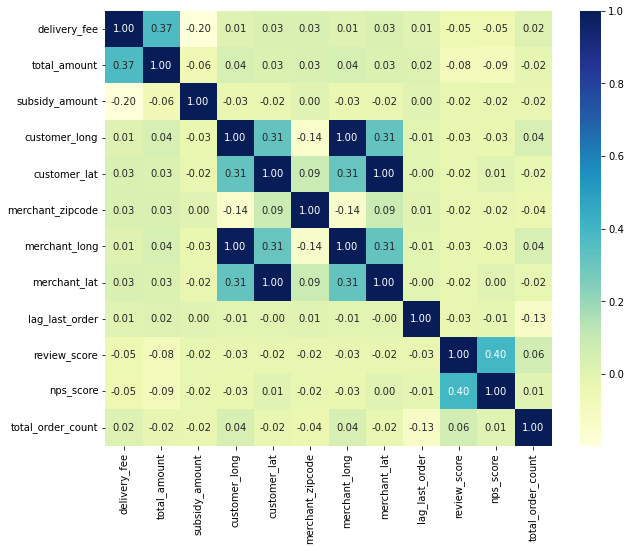

In [47]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(10,8))

sns.heatmap(
    dfnumeral.corr(), 
    annot=True,    
    fmt='.2f',    
    cmap='YlGnBu',   
)

plt.show()

In [48]:
#Removendo variávels muito correlacionadas
dfnumeral.drop(["merchant_long", "merchant_lat"], axis=1, inplace=True)

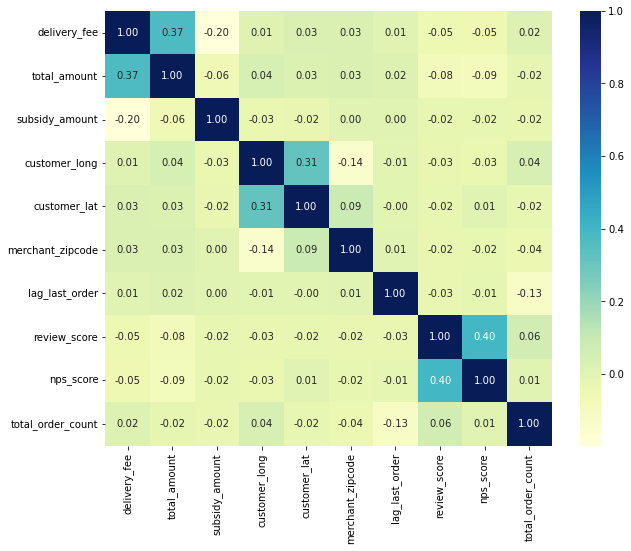

In [49]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(10,8))

sns.heatmap(
    dfnumeral.corr(), 
    annot=True,    
    fmt='.2f',    
    cmap='YlGnBu',   
)

plt.show()

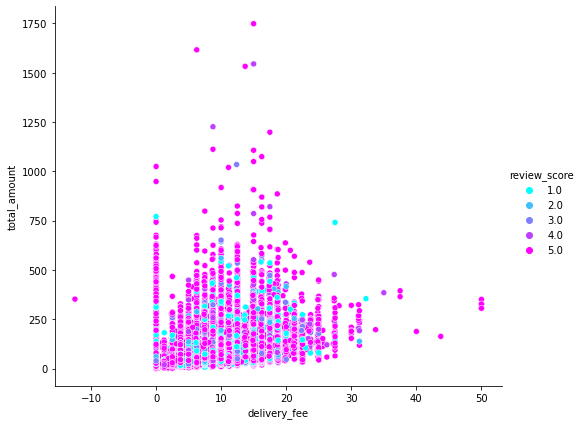

In [50]:
# Scatterplots para visualizar duas variáveis continuas
sns.relplot(data=dfnumeral, x='delivery_fee', y='total_amount', kind='scatter', height=6, aspect=1.2, hue='review_score', 
            palette='cool')

In [51]:
dfnumeral.describe() #Necessita normalização

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,lag_last_order,review_score,nps_score,total_order_count
count,221633.000000,221633.000000,221633.000000,221633.000000,221633.000000,2.216330e+05,221633.000000,221633.000000,221633.000000,221633.000000
mean,4.080909,60.753055,3.492179,-45.689116,-23.187974,1.709253e+07,2.533337,4.660759,9.093700,538.463266
std,5.048729,52.022200,6.813766,2.194990,2.227471,2.108466e+07,12.094645,0.935141,1.908111,353.567104
min,-12.475000,0.000000,-0.025000,-67.870000,-31.780000,0.000000e+00,0.000000,1.000000,1.000000,2.000000
25%,0.000000,28.625000,0.000000,-46.700000,-23.600000,4.048000e+06,0.000000,5.000000,9.000000,299.000000
50%,0.000000,46.000000,0.000000,-46.620000,-23.530000,6.773290e+06,1.000000,5.000000,10.000000,470.000000
75%,7.500000,76.237500,6.237500,-43.350000,-22.940000,2.222101e+07,2.000000,5.000000,10.000000,691.000000
max,50.000000,1748.737500,196.112500,-34.820000,2.850000,9.907006e+07,1429.000000,5.000000,10.000000,3098.000000


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(dfnumeral)

In [54]:
scaled_df

array([[ 0.92480745, -0.13461697, -0.5125193 , ...,  0.36277089,
        -0.57318597, -0.91203053],
       [ 0.18204455, -0.27878652, -0.5125193 , ...,  0.36277089,
        -0.57318597, -0.91203053],
       [ 1.41998273,  0.22580689, -0.5125193 , ...,  0.36277089,
        -0.57318597, -0.91203053],
       ...,
       [ 0.92233158, -0.01471597, -0.5125193 , ...,  0.36277089,
        -0.57318597,  0.03545794],
       [ 1.66757036, -0.20910457, -0.5125193 , ..., -1.7759499 ,
        -1.0972657 , -0.56131838],
       [-0.808306  , -0.3989278 , -0.5125193 , ..., -1.7759499 ,
        -0.57318597, -1.50032188]])

In [55]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9
0,0.924807,-0.134617,-0.512519,1.065664,0.160709,0.216171,-0.126778,0.362771,-0.573186,-0.912031
1,0.182045,-0.278787,-0.512519,1.065664,0.160709,0.210576,0.121266,0.362771,-0.573186,-0.912031
2,1.419983,0.225807,-0.512519,1.065664,0.160709,0.185806,-0.126778,0.362771,-0.573186,-0.912031
3,1.169919,0.239503,-0.512519,1.065664,0.160709,0.401849,-0.126778,0.362771,-0.573186,-0.912031
4,2.160270,-0.086801,-0.512519,1.065664,0.160709,0.399959,-0.126778,0.362771,-0.573186,-0.912031
...,...,...,...,...,...,...,...,...,...,...
221628,-0.808306,-0.639210,-0.512519,-0.419540,-0.202933,-0.613313,0.369310,0.362771,0.474973,-1.491837
221629,-0.808306,-0.003182,-0.512519,1.061108,0.160709,0.196235,10.869849,-2.845310,-1.097266,-1.429614
221630,0.922332,-0.014716,-0.512519,-0.460542,-0.167018,-0.748489,-0.126778,0.362771,-0.573186,0.035458
221631,1.667570,-0.209105,-0.512519,-0.410428,-0.140081,-0.699682,0.865398,-1.775950,-1.097266,-0.561318


## Produtização

In [56]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

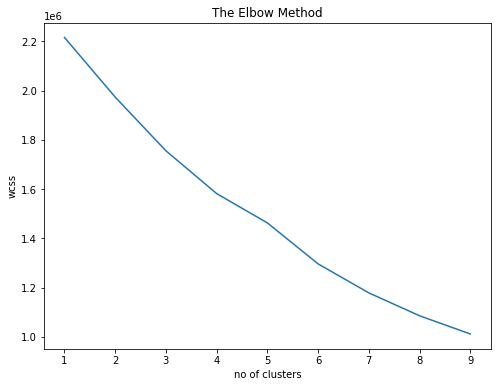

In [57]:
plt.figure(figsize=(8,6))
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [58]:
from kneed import KneeLocator, DataGenerator as dg
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")
kl.elbow

6

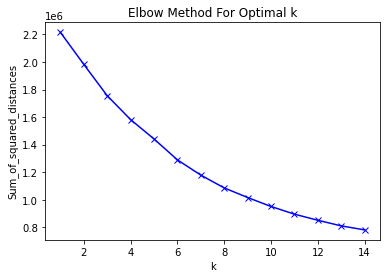

In [59]:
Sum_of_squared_distances =[]
K = range(1,15)

for i in K:
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter=100)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
    
###plotting Elbow

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [60]:
from sklearn.decomposition import PCA

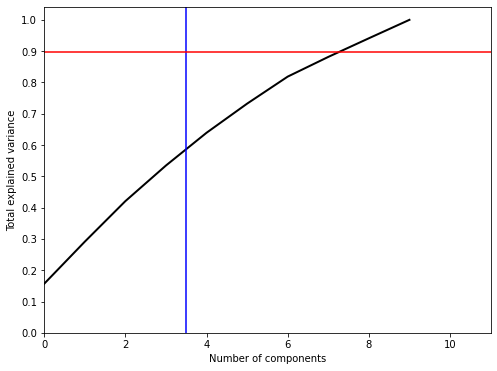

In [61]:
pca = PCA().fit(scaled_df)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(3.5, c='b')
plt.axhline(0.896, c='r')
plt.show()

In [62]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
X_reduced_train = pca.fit_transform(scaled_df)

Text(0.5, 1.0, 'MNIST. PCA projection')

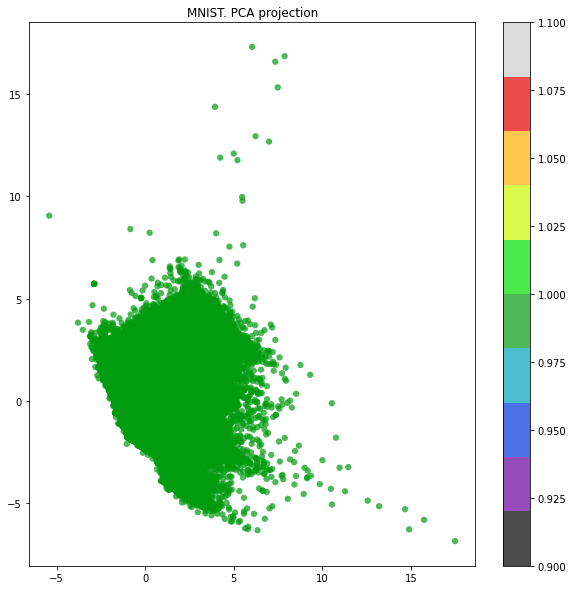

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=[1]*scaled_df.shape[0], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

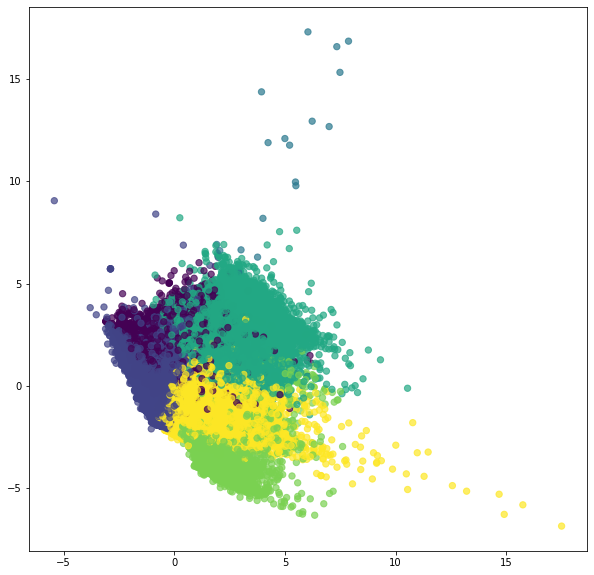

In [65]:
f, ax  = plt.subplots(figsize = (10,10))

kmeansmodel = KMeans(n_clusters= 6, init='k-means++',random_state=0)
y_kmeans_train2 = kmeansmodel.fit_predict(scaled_df)

plt.scatter(X_reduced_train[:,0], X_reduced_train[:,1], c=y_kmeans_train2, alpha=0.7, s=40)

In [66]:
scaler.inverse_transform(scaled_df)

array([[8.7500000e+00, 5.3750000e+01, 4.4408921e-16, ..., 5.0000000e+00,
        8.0000000e+00, 2.1600000e+02],
       [5.0000000e+00, 4.6250000e+01, 4.4408921e-16, ..., 5.0000000e+00,
        8.0000000e+00, 2.1600000e+02],
       [1.1250000e+01, 7.2500000e+01, 4.4408921e-16, ..., 5.0000000e+00,
        8.0000000e+00, 2.1600000e+02],
       ...,
       [8.7375000e+00, 5.9987500e+01, 4.4408921e-16, ..., 5.0000000e+00,
        8.0000000e+00, 5.5100000e+02],
       [1.2500000e+01, 4.9875000e+01, 4.4408921e-16, ..., 3.0000000e+00,
        7.0000000e+00, 3.4000000e+02],
       [0.0000000e+00, 4.0000000e+01, 4.4408921e-16, ..., 3.0000000e+00,
        8.0000000e+00, 8.0000000e+00]])

In [67]:
data_df = pd.DataFrame(scaled_df)

In [68]:
data_df

,0,1,2,3,4,5,6,7,8,9
0,0.924807,-0.134617,-0.512519,1.065664,0.160709,0.216171,-0.126778,0.362771,-0.573186,-0.912031
1,0.182045,-0.278787,-0.512519,1.065664,0.160709,0.210576,0.121266,0.362771,-0.573186,-0.912031
2,1.419983,0.225807,-0.512519,1.065664,0.160709,0.185806,-0.126778,0.362771,-0.573186,-0.912031
3,1.169919,0.239503,-0.512519,1.065664,0.160709,0.401849,-0.126778,0.362771,-0.573186,-0.912031
4,2.160270,-0.086801,-0.512519,1.065664,0.160709,0.399959,-0.126778,0.362771,-0.573186,-0.912031
...,...,...,...,...,...,...,...,...,...,...
221628,-0.808306,-0.639210,-0.512519,-0.419540,-0.202933,-0.613313,0.369310,0.362771,0.474973,-1.491837
221629,-0.808306,-0.003182,-0.512519,1.061108,0.160709,0.196235,10.869849,-2.845310,-1.097266,-1.429614
221630,0.922332,-0.014716,-0.512519,-0.460542,-0.167018,-0.748489,-0.126778,0.362771,-0.573186,0.035458
221631,1.667570,-0.209105,-0.512519,-0.410428,-0.140081,-0.699682,0.865398,-1.775950,-1.097266,-0.561318


In [69]:
data_df['clusters'] = y_kmeans_train2

In [70]:
df2['clusters'] = y_kmeans_train2

In [71]:
df2.groupby(['clusters']).mean()

,delivery_fee,total_amount,subsidy_amount,customer_long,customer_lat,merchant_zipcode,merchant_long,merchant_lat,lag_last_order,review_score,nps_score,total_order_count
clusters,,,,,,,,,,,,
0,4.265882,60.119945,4.166522,-49.580510,-24.956726,8.152326e+07,-49.581208,-24.956094,2.854547,4.729109,9.195432,471.767545
1,1.076708,41.419163,4.515670,-45.565161,-23.314520,1.036050e+07,-45.565215,-23.315494,2.274495,4.913576,9.567605,538.728790
2,3.324306,56.527083,2.838194,-45.708889,-23.480556,1.433102e+07,-45.712778,-23.476667,952.111111,4.277778,9.166667,26.555556
3,4.581264,70.363762,3.824959,-45.327863,-23.235088,1.374044e+07,-45.324313,-23.235191,3.109718,2.424232,5.261104,515.329303
4,5.008059,66.617930,2.517376,-41.583149,-5.991308,5.866427e+07,-41.575656,-5.999339,2.318562,4.549582,9.321467,426.371958
5,9.669480,95.139693,1.261670,-45.206924,-23.225577,1.249403e+07,-45.207899,-23.226213,2.500008,4.878255,9.372620,568.054390


## EDA após cluster

In [72]:
# Distribuição da variável device_platform
df2[["device_platform"]].value_counts()

device_platform
ANDROID            117953
IOS                 84987
DESKTOP             18693
dtype: int64

<AxesSubplot:xlabel='device_platform', ylabel='count'>

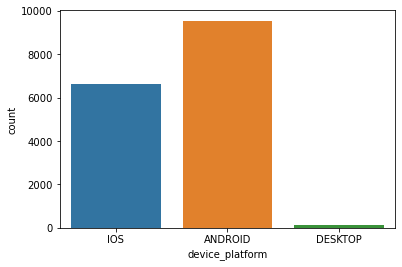

In [73]:
plataforma = df2['clusters'] == 0
df_plataforma = df2[plataforma]
df_plataforma['device_platform']
sns.countplot(df_plataforma['device_platform'])

<AxesSubplot:xlabel='device_platform', ylabel='count'>

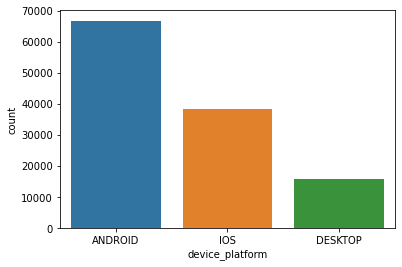

In [74]:
plataforma = df2['clusters'] == 1
df_plataforma = df2[plataforma]
df_plataforma['device_platform']
sns.countplot(df_plataforma['device_platform'])

<AxesSubplot:xlabel='device_platform', ylabel='count'>

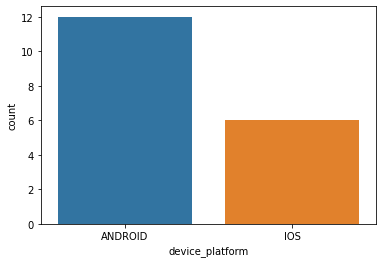

In [75]:
plataforma = df2['clusters'] == 2
df_plataforma = df2[plataforma]
df_plataforma['device_platform']
sns.countplot(df_plataforma['device_platform'])

<AxesSubplot:xlabel='device_platform', ylabel='count'>

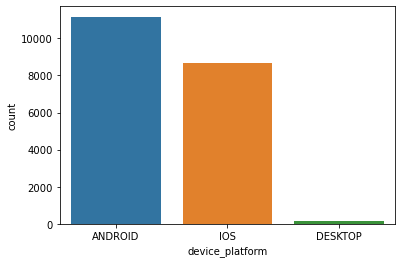

In [76]:
plataforma = df2['clusters'] == 3
df_plataforma = df2[plataforma]
df_plataforma['device_platform']
sns.countplot(df_plataforma['device_platform'])

<AxesSubplot:xlabel='device_platform', ylabel='count'>

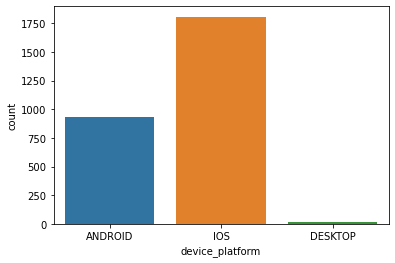

In [77]:
plataforma = df2['clusters'] == 4
df_plataforma = df2[plataforma]
df_plataforma['device_platform']
sns.countplot(df_plataforma['device_platform'])

<AxesSubplot:xlabel='device_platform', ylabel='count'>

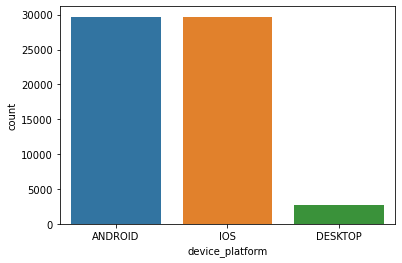

In [78]:
plataforma = df2['clusters'] == 5
df_plataforma = df2[plataforma]
df_plataforma['device_platform']
sns.countplot(df_plataforma['device_platform'])

In [79]:
# Distribuição da variável has_free_delivery
df2[["has_free_delivery"]].value_counts()

has_free_delivery
True                 116680
False                104953
dtype: int64

<AxesSubplot:xlabel='has_free_delivery', ylabel='count'>

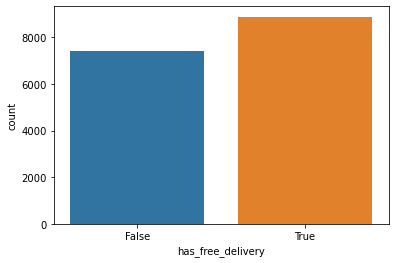

In [80]:
freedelivery = df2['clusters'] == 0
df_freedelivery = df2[freedelivery]
df_freedelivery['has_free_delivery']
sns.countplot(df_freedelivery['has_free_delivery'])

<AxesSubplot:xlabel='has_free_delivery', ylabel='count'>

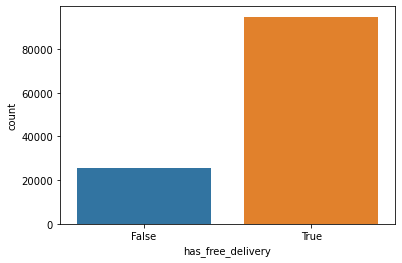

In [81]:
freedelivery = df2['clusters'] == 1
df_freedelivery = df2[freedelivery]
df_freedelivery['has_free_delivery']
sns.countplot(df_freedelivery['has_free_delivery'])

<AxesSubplot:xlabel='has_free_delivery', ylabel='count'>

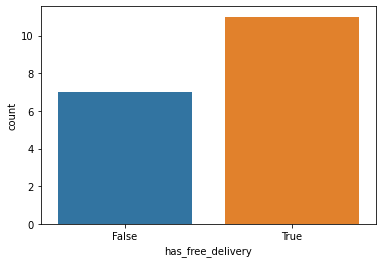

In [82]:
freedelivery = df2['clusters'] == 2
df_freedelivery = df2[freedelivery]
df_freedelivery['has_free_delivery']
sns.countplot(df_freedelivery['has_free_delivery'])

<AxesSubplot:xlabel='has_free_delivery', ylabel='count'>

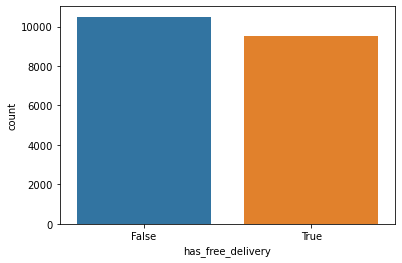

In [83]:
freedelivery = df2['clusters'] == 3
df_freedelivery = df2[freedelivery]
df_freedelivery['has_free_delivery']
sns.countplot(df_freedelivery['has_free_delivery'])

<AxesSubplot:xlabel='has_free_delivery', ylabel='count'>

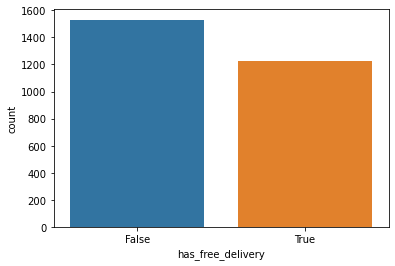

In [84]:
freedelivery = df2['clusters'] == 4
df_freedelivery = df2[freedelivery]
df_freedelivery['has_free_delivery']
sns.countplot(df_freedelivery['has_free_delivery'])

<AxesSubplot:xlabel='has_free_delivery', ylabel='count'>

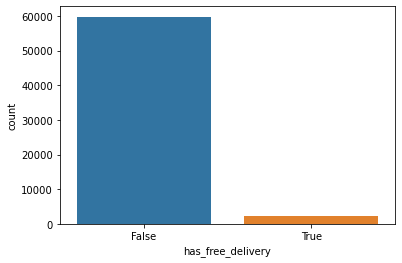

In [85]:
freedelivery = df2['clusters'] == 5
df_freedelivery = df2[freedelivery]
df_freedelivery['has_free_delivery']
sns.countplot(df_freedelivery['has_free_delivery'])

In [86]:
# Distribuição da variável ifood_status
df2[["ifood_status"]].value_counts()

ifood_status
Active          160971
Inactive         31806
Churn            25834
Reactivated       3022
dtype: int64

<AxesSubplot:xlabel='ifood_status', ylabel='count'>

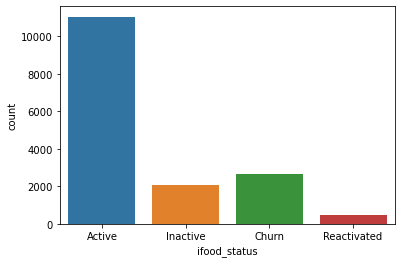

In [87]:
ifoodstatus = df2['clusters'] == 0
df_ifoodstatus = df2[ifoodstatus]
df_ifoodstatus['ifood_status']
sns.countplot(df_ifoodstatus['ifood_status'])

<AxesSubplot:xlabel='ifood_status', ylabel='count'>

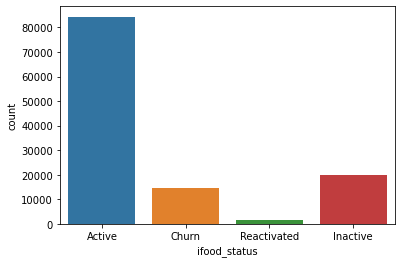

In [88]:
ifoodstatus = df2['clusters'] == 1
df_ifoodstatus = df2[ifoodstatus]
df_ifoodstatus['ifood_status']
sns.countplot(df_ifoodstatus['ifood_status'])

<AxesSubplot:xlabel='ifood_status', ylabel='count'>

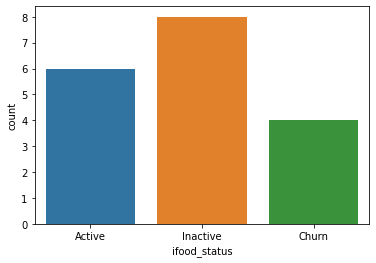

In [89]:
ifoodstatus = df2['clusters'] == 2
df_ifoodstatus = df2[ifoodstatus]
df_ifoodstatus['ifood_status']
sns.countplot(df_ifoodstatus['ifood_status'])

<AxesSubplot:xlabel='ifood_status', ylabel='count'>

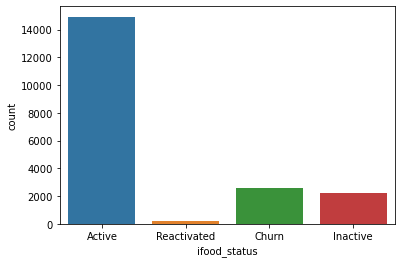

In [90]:
ifoodstatus = df2['clusters'] == 3
df_ifoodstatus = df2[ifoodstatus]
df_ifoodstatus['ifood_status']
sns.countplot(df_ifoodstatus['ifood_status'])

<AxesSubplot:xlabel='ifood_status', ylabel='count'>

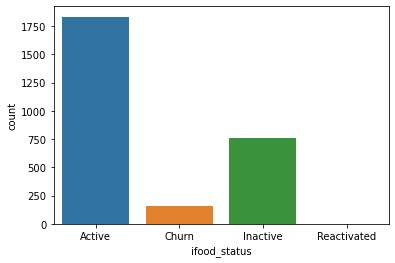

In [91]:
ifoodstatus = df2['clusters'] == 4
df_ifoodstatus = df2[ifoodstatus]
df_ifoodstatus['ifood_status']
sns.countplot(df_ifoodstatus['ifood_status'])

<AxesSubplot:xlabel='ifood_status', ylabel='count'>

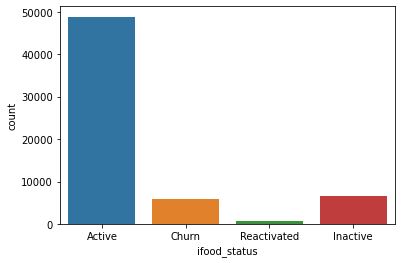

In [92]:
ifoodstatus = df2['clusters'] == 5
df_ifoodstatus = df2[ifoodstatus]
df_ifoodstatus['ifood_status']
sns.countplot(df_ifoodstatus['ifood_status'])

In [93]:
# Distribuição da variável order_shift
df2[["order_shift"]].value_counts()

order_shift      
weekday lunch        57340
weekday dinner       52881
weekend dinner       50240
weekend lunch        22571
weekday snack        13139
weekday breakfast    11159
weekend snack         5860
weekday dawn          3597
weekend dawn          3193
weekend breakfast     1653
dtype: int64

<AxesSubplot:xlabel='order_shift', ylabel='count'>

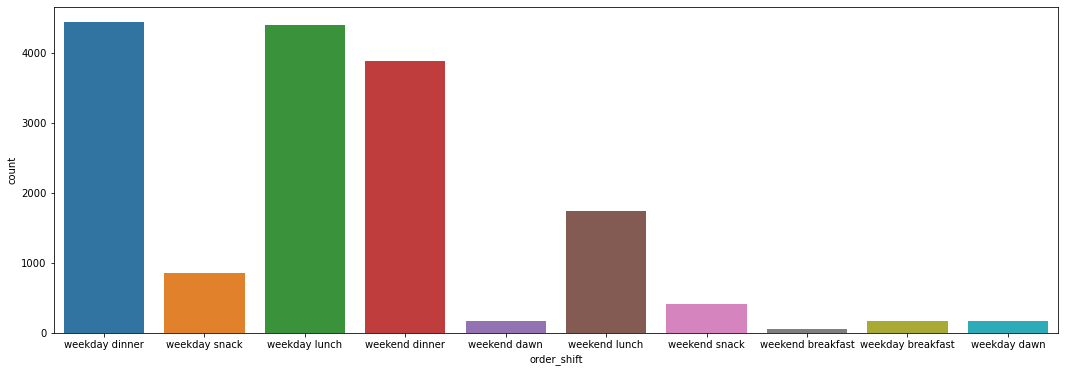

In [94]:
plt.figure(figsize=(18,6))
pedido = df2['clusters'] == 0
df_pedido = df2[pedido]
df_pedido['order_shift']
sns.countplot(df_pedido['order_shift'])

<AxesSubplot:xlabel='order_shift', ylabel='count'>

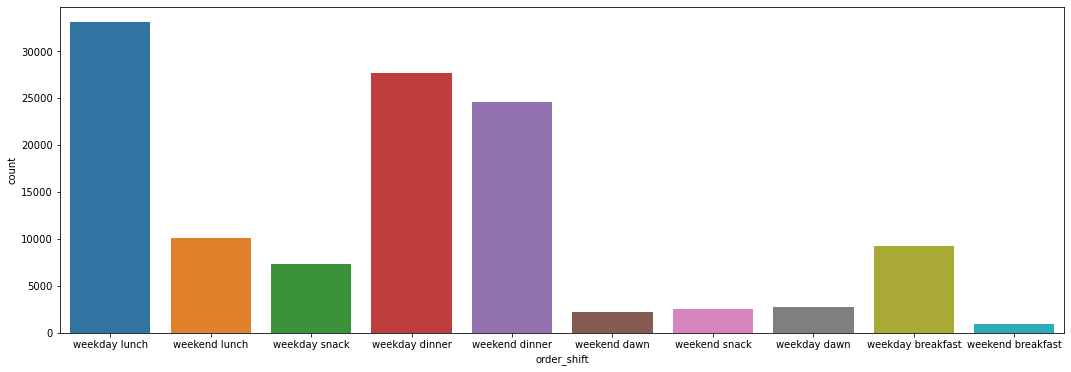

In [95]:
plt.figure(figsize=(18,6))
pedido = df2['clusters'] == 1
df_pedido = df2[pedido]
df_pedido['order_shift']
sns.countplot(df_pedido['order_shift'])

<AxesSubplot:xlabel='order_shift', ylabel='count'>

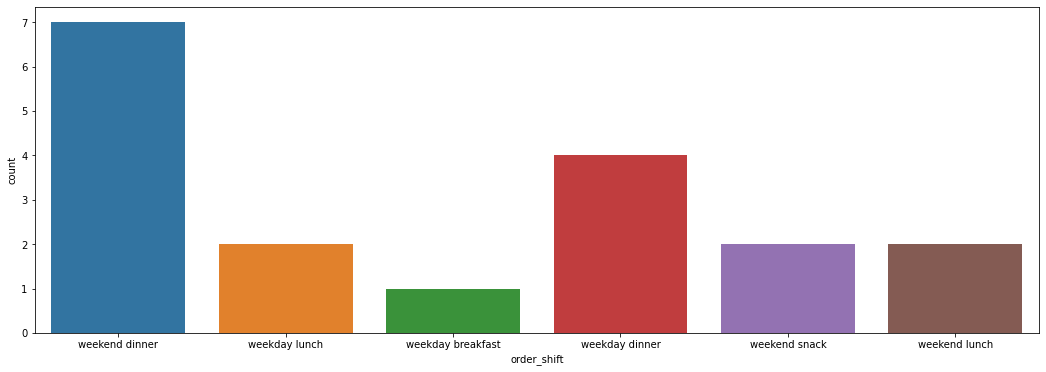

In [96]:
plt.figure(figsize=(18,6))
pedido = df2['clusters'] == 2
df_pedido = df2[pedido]
df_pedido['order_shift']
sns.countplot(df_pedido['order_shift'])

<AxesSubplot:xlabel='order_shift', ylabel='count'>

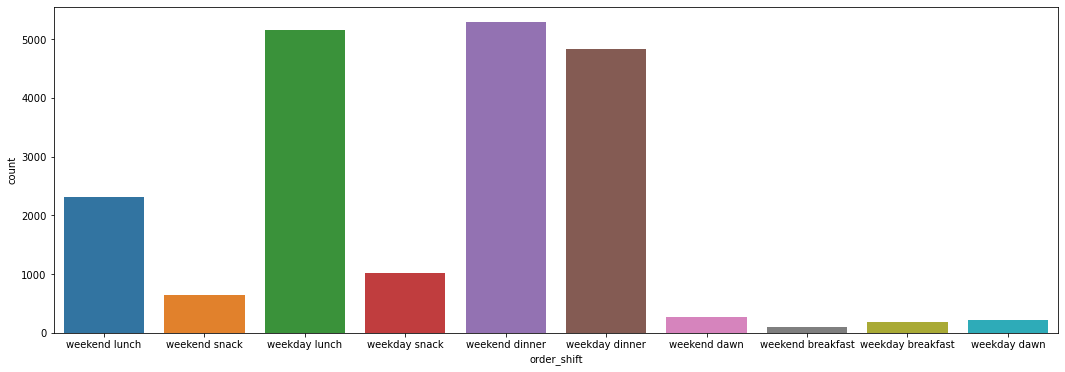

In [97]:
plt.figure(figsize=(18,6))
pedido = df2['clusters'] == 3
df_pedido = df2[pedido]
df_pedido['order_shift']
sns.countplot(df_pedido['order_shift'])

<AxesSubplot:xlabel='order_shift', ylabel='count'>

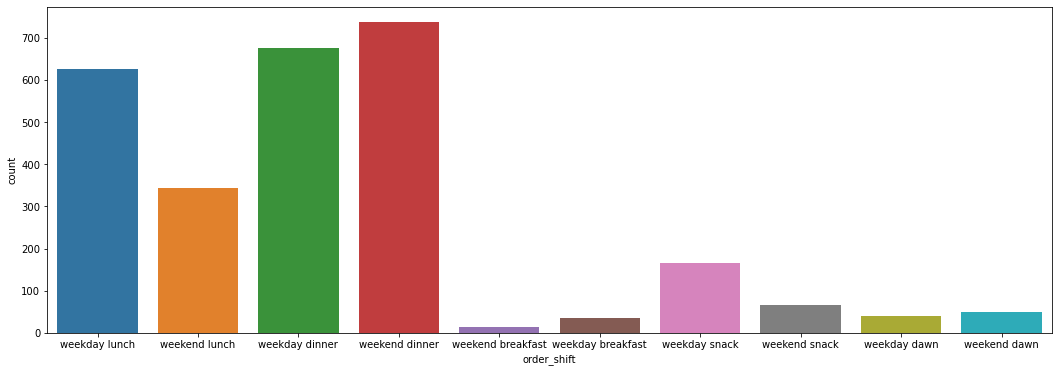

In [98]:
plt.figure(figsize=(18,6))
pedido = df2['clusters'] == 4
df_pedido = df2[pedido]
df_pedido['order_shift']
sns.countplot(df_pedido['order_shift'])

<AxesSubplot:xlabel='order_shift', ylabel='count'>

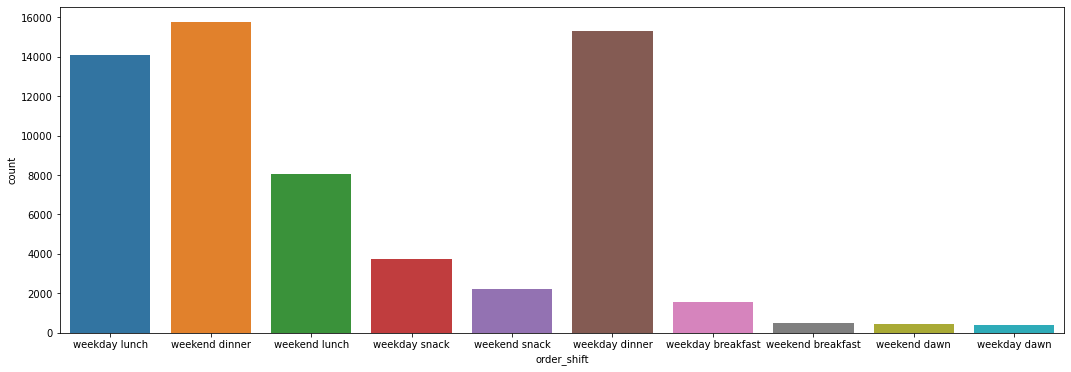

In [99]:
plt.figure(figsize=(18,6))
pedido = df2['clusters'] == 5
df_pedido = df2[pedido]
df_pedido['order_shift']
sns.countplot(df_pedido['order_shift'])

### Personas

Foram encontrados 6 tipos de personas:

**0** Clientes que gastam em média 60,00 e pagam uma taxa de entrega de 4,25, utilizam mais Android que IOS, utilizam mais entrega grátis apesar de não diferir muito, são em maioria usuários ativos no ifood, costumam fazer pedidos durante a semana para almoço e jantar e no final de semana para o jantar.

**1** Clientes que gastam em média 41,00 e pagam uma taxa de entrega de 1,00, utilizam mais Android que IOS (e alguns utilizam Desktop), utilizam muito mais entrega grátis, são em maioria usuários ativos no ifood, costumam fazer pedidos durante a semana para almoço e jantar e no final de semana para o jantar.

**2** Clientes que gastam em média 56,00 e pagam uma taxa de entrega de 3,30, utilizam mais Android que IOS, utilizam mais entrega grátis, diferentemente dos demais são em maioria usuários inativos no ifood, costumam fazer pedidos principalmente durante ao fim de semana para jantar e durante a semana no jantar.

**3** Clientes que gastam em média 70,00 e pagam uma taxa de entrega de 4,60, utilizam mais Android que IOS, não diferem muito no tipo de entrega, são em maioria usuários ativos no ifood, costumam fazer pedidos principalmente durante a semana para o almoço e jantar e durante o fim de semana no jantar.

**4** Clientes que gastam em média 66,00 e pagam uma taxa de entrega de 5,00, diferentemente dos demais, utilizam mais IOS que Android, não diferem muito no tipo de entrega e utilizam mais entregas com pagamento de delivery , são em maioria usuários ativos no ifood, costumam fazer pedidos principalmente durante a semana para o almoço e jantar e durante o fim de semana no jantar.

**5** Clientes que mais gastam, em média 95,00 e pagam taxa de entrega mais alta, de 9,60, não diferem entre uso de IOS e Android, maioria não utiliza entrega grátis, são em maioria usuários ativos no ifood, costumam fazer pedidos principalmente durante a semana para o almoço e jantar e durante o fim de semana no jantar.